# Data Pre-Processing


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dataset/exploratory_data.csv')

### 2.1
<p><b>Total count of missing values per column.</b> </p>

In [3]:
df.isna().sum()

Unnamed: 0                  0
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

<b>Percentage of missing values in each column</b>

In [4]:
# Percentage of Missing value in each column
df.isna().sum()*100/len(df)

Unnamed: 0              0.000000
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

###  2.2

In [5]:
# Among 'emp_title' and 'emp_length' columns I am dropping emp_title as it is not much important in this context.
# whereas, emp_length column is getting used in subsequent steps.
df.drop('emp_title', axis=1, inplace=True)

###  2.3
<p> Count plot of the emp_length column and sort the order of values</p>
<b>a. Descending Order.</b>

<AxesSubplot:xlabel='emp_length', ylabel='count'>

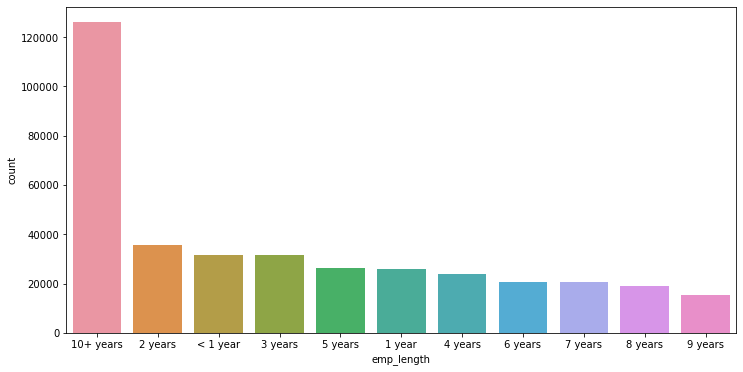

In [8]:
# Drawing countplot using 'sns' library in Descending order
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',data=df,order=df['emp_length'].value_counts().index)

<b> b. Ascending Order </b>

<AxesSubplot:>

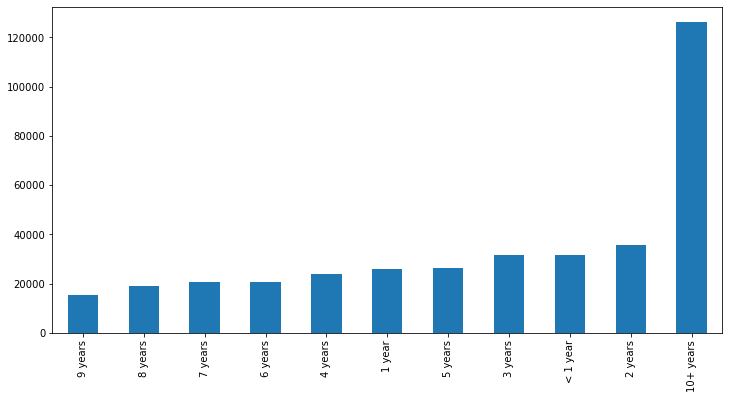

In [9]:
# Drawing countplot using 'pandas' library in Ascending order
plt.figure(figsize=(12,6))
df['emp_length'].value_counts(ascending=True).plot(kind='bar')

###  2.4 
<p><b> Countplot separating Fully Paid vs Charged Off </b> </p>


<AxesSubplot:xlabel='emp_length', ylabel='count'>

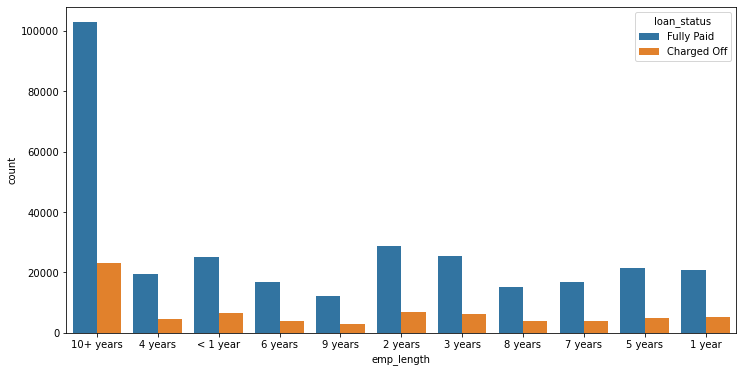

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', hue='loan_status', data=df)

###  2.5
<p> <b>Percentage of charge offs per category. What percent of people per employment category
    didn't pay back their loan? </b></p>
<p> By the term employment category it means 'length of employment'. For each employment length (10+ years, 4 years, and so on) I am finding how much percentage of employees in that category were not able to pay back loan.</p>



In [11]:
# Basically in this task we have to sum both the bars (blue and yellow) per category to calculate total people in
# that category. There after we will divide count of charged off category with total count to get percentage.

# First, I am calculating count of people in each employment category(10+ years, 4 years,and so on) who have paid 
# loan.
fully_paid_count = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
fully_paid_count

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [12]:
# Secondly, I am calculating count of people in each employment category who were not able to pay loan.
charged_of_count = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']
charged_of_count

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [13]:
sum = fully_paid_count+charged_of_count
sum

emp_length
1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: loan_status, dtype: int64

In [14]:
charged_off_percent = (charged_of_count/sum)*100
charged_off_percent

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

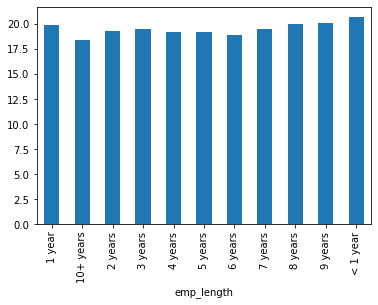

In [15]:
# Percentage of people in each category who were not able to pay back loan.
charged_off_percent.plot(kind='bar')

###  2.6

<b> EXPLANATION </b>
<p> By seeing BAR graph made in 2.5, it is clearly evident that charged_off percentage is almost similar in all the categories of employment. So, emp_length column is not making any significant meaning in the current scope due to which I have dropped emp_length column.</p>

In [16]:
df.drop('emp_length',axis=1,inplace=True)

### 2.7 and 2.8

In [17]:
df.purpose.unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [18]:
df.title.unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

<b>EXPLANATION of 2.7 and 2.8</b>
<p><b>'purpose' </b>is basically detailed information/reason for which the customer wants to take loan. It is provided by the customer. Whereas, on the other hand <b>'title'</b> column is looking like subset of purpose column. 
So we can <b>drop title</b> column. 



In [19]:
df.drop('title',axis=1,inplace=True)

###  2.9
a. Analysing <b>mort_acc</b> feature and creating a value_counts of the mort_acc column.

In [20]:
df.mort_acc

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [21]:
# mort_acc column means Number of Mortgage Accounts
df.mort_acc.value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

<b> EXPLANATION: </b>
<p>From the above Output we can see that most customers (139777) in this dataset have 0 mortage accounts, and only 1 customer has 34 mortgage accounts which is maximum.</p>

<b> b. Fill the missing values in mort_acc if any using appropriate approach. </b><br> 
<b> NOTE: </b>Before filling missing values we have to check if this column is related to some other column of dataset.

In [22]:
df.mort_acc.isna().sum()
# Total number of missing values in 'mort_acc' column

37795

### 2.10
<p> Relation of <b>mort_acc</b> column with other columns

In [23]:
# I have used coorelation matrix to check reltation
df.corr()['mort_acc']

Unnamed: 0             -0.000322
loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

In [24]:
# From the above output we can see that 'total_acc' column is closely related to 'mort_acc' column as compared to
# all other columns. So I will take mean of 'total_acc' column and replace it with NaN values in 'mort_acc' column.

# This solution is part of Task 2.9
df['mort_acc'] = df['mort_acc'].fillna(df['total_acc'].mean())

In [25]:
df['mort_acc'].isna().sum()

0

###  2.11
<p>a. Finding missing values in <b>revol_util</b> and the <b>pub_rec_bankruptcies</b> </p>

In [26]:
print("Total number of records in revol_util column:",len(df.revol_util))
print("Number of missing values",df.revol_util.isna().sum())

Total number of records in revol_util column: 396030
Number of missing values 276


In [27]:
print("Total number of records in pub_rec_bankruptcies column:",len(df.pub_rec_bankruptcies))
print("Number of missing values",df.pub_rec_bankruptcies.isna().sum())

Total number of records in pub_rec_bankruptcies column: 396030
Number of missing values 535


<b> EXPLANATION: </b>
As missing values are very less in number and total percentage when compared to total records in dataset so we can remove those rows.

In [28]:
# Checking if NaN value is present in any other column of Dataframe
df.isna().sum()

Unnamed: 0                0
loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [29]:
df = df.dropna(subset=['revol_util'])

In [30]:
df = df.dropna(subset=['pub_rec_bankruptcies'])

###  2.12
<p> List all the columns that are currently non-numeric.</p>

In [31]:
df.select_dtypes(include=np.object).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### 2.13
Convert <b>'term'</b> column into either a 36 or 60 integer numeric data type

In [32]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

### 2.14
<b> EXPLANATION:</b>
<p> I have dropped <b>grade</b> column as 'grade' column is kind of subset of 'sub_grade' column. Information carried by <b>grade</b> column is present in <b>sub_grade</b> column so, there will not be any Information loss.

In [33]:
df.drop('grade', axis=1, inplace =True)

### 2.15
<p><b>a. Converting the subgrade into dummy variables.</b></p>



In [34]:
# I am using get_dummies method which makes dummy variables of categorical data. It is bit similar to One Hot 
# Encoding function of SkLearn, however, One Hot Encoder does not add dummy variables to dataframe by default.
dummy_variables = pd.get_dummies(df['sub_grade'],drop_first=True)
dummy_variables

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p> <b>b. Concatenate these new columns to the original dataframe</b></p>

In [35]:
df= pd.concat([df.drop('sub_grade',axis=1), dummy_variables], axis=1)
df

,Unnamed: 0,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
1,1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
2,2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
3,3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
4,4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,396025,10000.0,60,10.99,217.38,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396026,396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396027,396027,5000.0,36,9.99,161.32,RENT,56500.0,Verified,Oct-2013,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396028,396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,...,0,0,0,0,0,0,0,0,0,0


###  2.16
<p><b>a. Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables</b></p>

In [36]:
dummy = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)
dummy

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
396026,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396027,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396028,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<p><b> b. Concatenate these dummy variables with the original dataframe. </b></p>



In [37]:
df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1, inplace= True)

In [38]:
df= pd.concat([df,dummy],axis=1)
df

,Unnamed: 0,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,...,0,0,0,0,0,0,0,0,1,0
1,1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,...,0,0,0,0,0,0,0,0,0,0
2,2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,...,0,0,0,0,0,0,0,0,0,0
3,3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,...,0,0,0,0,0,0,0,0,0,0
4,4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,396025,10000.0,60,10.99,217.38,RENT,40000.0,Oct-2015,Fully Paid,15.63,...,0,0,0,0,0,0,0,0,0,0
396026,396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.45,...,0,0,0,0,0,0,0,0,0,0
396027,396027,5000.0,36,9.99,161.32,RENT,56500.0,Oct-2013,Fully Paid,17.56,...,0,0,0,0,0,0,0,0,0,0
396028,396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Aug-2012,Fully Paid,15.88,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.columns

Index(['Unnamed: 0', 'loan_amnt', 'term', 'int_rate', 'installment',
       'home_ownership', 'annual_inc', 'issue_d', 'loan_status', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_va

###  2.17

<p> Count for the various possible values of <b> home_ownership </b> column. </p>



In [40]:
# home_ownership column has below unique values with their count
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

###  2.18
<b> a. Replacing NONE and ANY with OTHER in 'home_ownership' column </b> 

In [41]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [42]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

<b>b. Convert home_ownership column to dummy variable</b>

In [43]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

<b>c. Concatenate dummy variables with the original dataframe </b>

In [44]:
df.drop('home_ownership',axis=1,inplace=True)

In [45]:
df=pd.concat([df,dummies],axis=1)
df

,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,1,0,0,0,1
1,1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,1
3,3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,1
4,4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,0,0,0,0,0,0,0,0,0,1
396026,396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,0,0,0,0,0,0,0,0,0
396027,396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,0,0,0,0,0,0,0,0,0,1
396028,396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,0,0,0,0,0,0,0,0,0,0


###  2.19
<b>Creating a column called 'zip_code' that extracts the zip code from the address column.</b>

In [46]:
df['zip_code']=df['address'].str[-5:]

In [47]:
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: object

In [48]:
df.columns

Index(['Unnamed: 0', 'loan_amnt', 'term', 'int_rate', 'installment',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_

### 2.20
<p> <b> a. Make 'zip_code' column into dummy variables.</b> </p>



In [49]:
dummy_zip_code=pd.get_dummies(df['zip_code'],drop_first=True)

<p><b>b. Concatenate the result and drop the original 'zip_code' column along with dropping the 'address' column.</b><p>

In [50]:
df.drop(['zip_code','address'], axis=1,inplace=True)

In [51]:
df=pd.concat([df,dummy_zip_code],axis=1)
df

,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,1,0,0,1,0,0,0,0,0,0
1,1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,1,0,0,0,0,0,0,0,0
2,2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,1,1,0,0,0,0,0,0,0,0
3,3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,1,0,0,0,0,0,0,0,0,0
4,4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,1,0,0,0,0,1,0,0,0,0
396026,396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,1,0,0,0,0,0,0,0,0
396027,396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,1,0,0,0,0,0,0,1,0,0
396028,396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,0,0,0,0,1,0,0,0,0,0


### 2.21
<p><b>a. Analyzing “earliest_cr_line” column. Extracting the year from this feature and then converting it to a numeric feature and set this new data to a feature column called 'earliest_cr_year'.</b></p>

In [52]:
df['earliest_cr_year']= df['earliest_cr_line'].str[-4:]
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: object

In [53]:
df.earliest_cr_year = df.earliest_cr_year.astype(str).astype(int)

In [54]:
df.columns

Index(['Unnamed: 0', 'loan_amnt', 'term', 'int_rate', 'installment',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', '

<b>b. Drop the 'earliest_cr_line' feature.</b>

In [55]:
df.drop('earliest_cr_line',axis=1, inplace =True)

In [56]:
df.columns

Index(['Unnamed: 0', 'loan_amnt', 'term', 'int_rate', 'installment',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '051

In [57]:
df.drop('issue_d',axis=1,inplace=True)

In [58]:
df.dtypes

Unnamed: 0            int64
loan_amnt           float64
term                  int64
int_rate            float64
installment         float64
                     ...   
48052                 uint8
70466                 uint8
86630                 uint8
93700                 uint8
earliest_cr_year      int64
Length: 81, dtype: object

In [59]:
df.drop('loan_status',axis=1,inplace=True)
df_copy=df.copy()

In [60]:
df

,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,...,0,0,1,0,0,0,0,0,0,1990
1,1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,...,1,0,0,0,0,0,0,0,0,2004
2,2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,...,1,0,0,0,0,0,0,0,0,2007
3,3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,2006
4,4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,396025,10000.0,60,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,...,0,0,0,0,1,0,0,0,0,2004
396026,396026,21000.0,36,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,...,1,0,0,0,0,0,0,0,0,2006
396027,396027,5000.0,36,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,...,0,0,0,0,0,0,1,0,0,1997
396028,396028,21000.0,60,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,...,0,0,0,1,0,0,0,0,0,1990


In [ ]:
df.to_csv('dataset/preprocessed_data_copy.csv')

In [61]:
df_copy=df.copy()
df_copy

,Unnamed: 0,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,...,0,0,1,0,0,0,0,0,0,1990
1,1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,...,1,0,0,0,0,0,0,0,0,2004
2,2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,...,1,0,0,0,0,0,0,0,0,2007
3,3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,2006
4,4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,396025,10000.0,60,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,...,0,0,0,0,1,0,0,0,0,2004
396026,396026,21000.0,36,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,...,1,0,0,0,0,0,0,0,0,2006
396027,396027,5000.0,36,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,...,0,0,0,0,0,0,1,0,0,1997
396028,396028,21000.0,60,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,...,0,0,0,1,0,0,0,0,0,1990


In [62]:
df_copy.to_csv('dataset/preprocessed_data.csv')

# End